"Image Morphological Operations in Python: Manual vs OpenCV"

This notebook explores image processing techniques, specifically focusing on morphological operations. It begins by reading and converting an image to a binary format manually without using built-in functions. The notebook then proceeds to implement the four fundamental morphological operators - Erosion, Dilation, Opening, and Closing - without relying on pre-built functions, displaying the transformed images. Subsequently, Python's OpenCV library is employed to achieve the same operations, showcasing the convenience and efficiency of utilizing established libraries for image processing tasks. This comparative exploration serves as a practical guide for understanding and implementing morphological operations in both manual and OpenCV-based approaches.

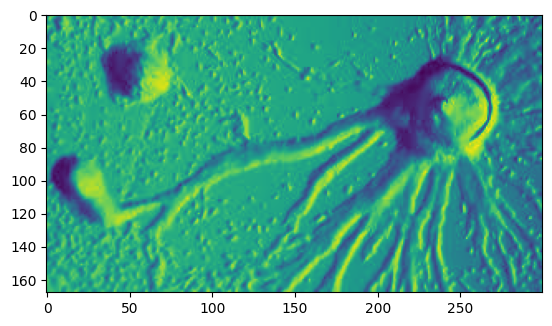

In [1]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/content/amoeba.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)

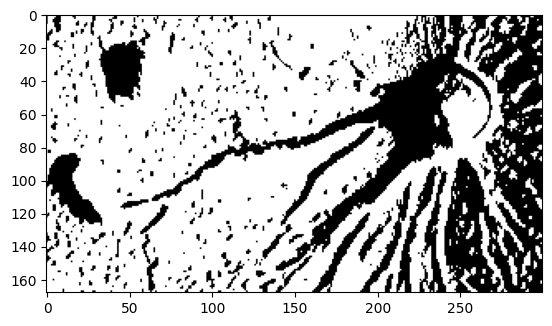

In [2]:
ret,binary = cv2.threshold(img,125,255,0)
plt.imshow(binary,cmap="gray")

Erosion:

Manual Approach: Involves sliding a structuring element (kernel) over the image. If all pixels underneath the kernel are 1 (white), the center pixel remains 1; otherwise, it becomes 0 (black).

Dilation:

Manual Approach: Similar to erosion, but the center pixel becomes 1 if at least one pixel under the kernel is 1.

In [3]:
import numpy as np
se = np.ones((4,4))
p,q = se.shape
zeros = np.zeros(binary.shape)

In [4]:
import math
for i in range(math.ceil(p/2),binary.shape[0] - math.floor(p/2)):
    for j in range(math.ceil(q/2),binary.shape[1] - math.floor(q/2)):
        on = binary[i-math.floor(p/2):i+math.floor(p/2),j-math.floor(q/2):j+math.floor(q/2)]
        nh = np.logical_and(on,se)
        zeros[i][j] = np.any(nh[:])

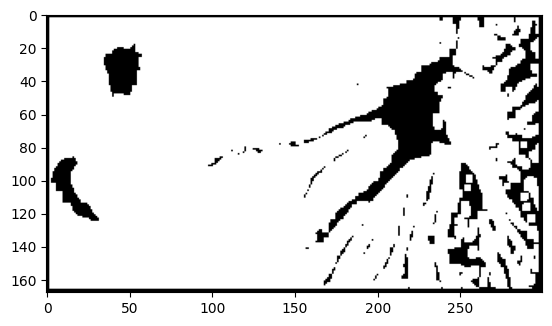

In [5]:
plt.imshow(zeros,cmap = "gray")

In [6]:
#dilation
import numpy as np
se = np.ones((4,4))
p,q = se.shape
zeros = np.zeros(binary.shape)

for i in range(math.ceil(p/2),binary.shape[0] - math.floor(p/2)):
    for j in range(math.ceil(q/2),binary.shape[1] - math.floor(q/2)):
           on = binary[i-math.floor(p/2):i+math.floor(p/2),j-math.floor(q/2):j+math.floor(q/2)]
           nh = np.logical_and(on,se)
           zeros[i][j] = np.all(nh[:])

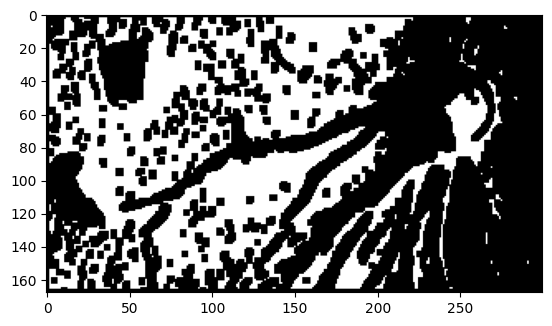

In [7]:
plt.imshow(zeros,cmap="gray")

Opening:

Manual Approach: Combines an erosion operation followed by a dilation operation. It helps remove noise and small objects from the image.

Closing:

Manual Approach: Combines a dilation operation followed by an erosion operation. It helps close small holes and gaps in the foreground.

In [8]:
# Opening
# Erosion followed by dilation

import numpy as np
se = np.ones((4,4))
p,q = se.shape
zeros = np.zeros(binary.shape)

for i in range(math.ceil(p/2),binary.shape[0] - math.floor(p/2)):
    for j in range(math.ceil(q/2),binary.shape[1] - math.floor(q/2)):
        on = binary[i-math.floor(p/2):i+math.floor(p/2),j-math.floor(q/2):j+math.floor(q/2)]
        nh = np.logical_xor(on,se)
        zeros[i][j] = np.any(nh[:])
        zeros[i][j] = np.all(nh[:])

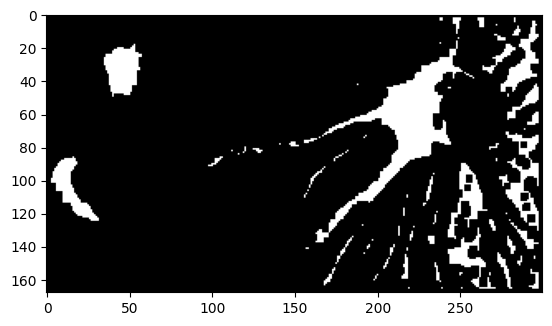

In [9]:
plt.imshow(zeros,cmap="gray")

In [10]:
# Closing
# Dilation followed by Erosion

import numpy as np
se = np.ones((4,4))
p,q = se.shape
zeros = np.zeros(binary.shape)

for i in range(math.ceil(p/2),binary.shape[0] - math.floor(p/2)):
    for j in range(math.ceil(q/2),binary.shape[1] - math.floor(q/2)):
           on = binary[i-math.floor(p/2):i+math.floor(p/2),j-math.floor(q/2):j+math.floor(q/2)]
           nh = np.logical_not(on,se)
           zeros[i][j] = np.all(nh[:])
           zeros[i][j] = np.any(nh[:])

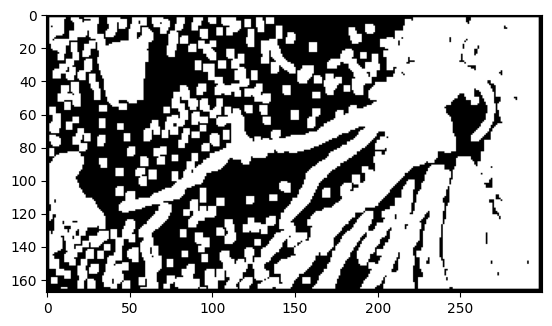

In [11]:
plt.imshow(zeros,cmap="gray")

Built in functions


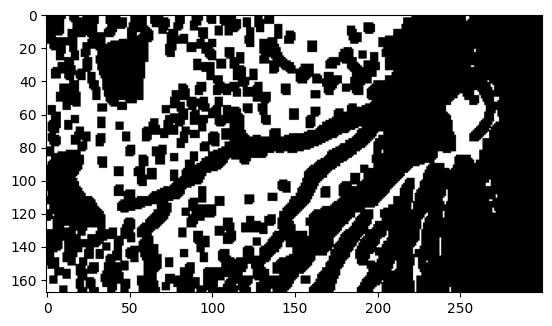

In [12]:
erosion = cv2.erode(binary,np.ones((5,5)),iterations=1)
plt.imshow(erosion,cmap="gray")

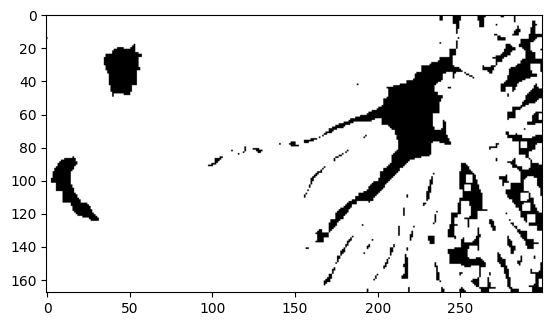

In [13]:
dilation = cv2.dilate(binary,np.ones((4,4)),iterations = 1)
plt.imshow(dilation,cmap="gray")

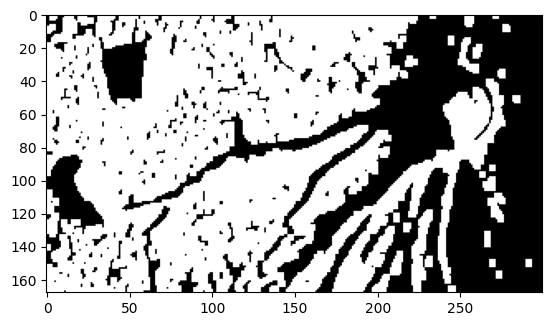

In [14]:
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, np.ones((4,4)))
plt.imshow(opening,cmap="gray")

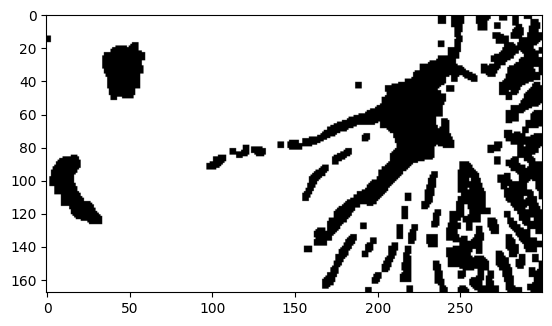

In [15]:
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, np.ones((4,4)))
plt.imshow(closing,cmap="gray")